# Decision Tree

In [60]:
#Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
#Data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [62]:
titanic_data.isnull().sum() / len(titanic_data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [63]:
titanic = titanic_data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis = 1)

In [64]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
#One hot encoding
titanic = pd.get_dummies(titanic, columns = ['Pclass', 'Sex', 'Embarked'], drop_first = True)

In [66]:
#Filling NAs
median_age = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(median_age)

In [67]:
# Standard scaling
scaler = StandardScaler()
columns_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']
titanic[columns_to_scale] = scaler.fit_transform(titanic[columns_to_scale])

In [68]:
#Variables
Y = titanic[['Survived']]
X = titanic.drop('Survived', axis = 1)

In [69]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [70]:
X_train.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [71]:
# Decision Tree classifier
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 30]
}

model_DT = DecisionTreeClassifier(min_samples_leaf=5,
                                  min_impurity_decrease = 0.02,
                                  class_weight='balanced')
grid_search = GridSearchCV(estimator=model_DT, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='recall')

grid_search.fit(X_train, y_train)

best_dtree_reg = grid_search.best_estimator_ 


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [72]:
# Prediction
m_DT2 = best_dtree_reg.fit(X_train, y_train)
y_pred_DT2 = m_DT2.predict(X_test)

In [73]:
# Classification matrix
accuracy = accuracy_score(y_test, y_pred_DT2)
classification_rep = classification_report(y_test, y_pred_DT2)
conf_matrix = confusion_matrix(y_test, y_pred_DT2)

In [74]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



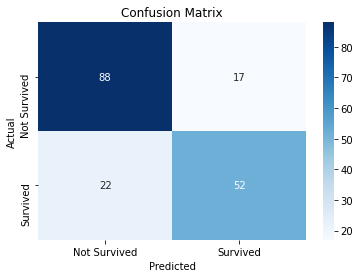

In [75]:
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [76]:
#Variables
Y = titanic[['Survived']]
X = titanic.drop('Survived', axis = 1)

In [77]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [78]:
# Parameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 30]
}

In [79]:
# Random Forest Classifier

model_RF = RandomForestClassifier(random_state=42)

In [80]:
# Grid Search CV
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=2)

In [81]:
# Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [82]:
best_model

RandomForestClassifier(max_depth=20, random_state=42)

In [83]:
# Prediction
y_pred = best_model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [85]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



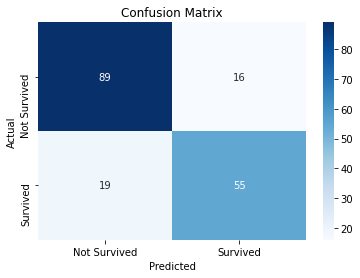

In [86]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()